# STATISTICS Applied to data science

## Exercises PART 1: Descriptive statistics and data exploration

Employing descriptive statistics is one of the main steps of the POC stage (proof-of-concept) and extremely helpful during model evaluation.  
A sound knowledge of statistics will help you design your machine learning experiments and interpret the results easily.   
In this notebook you'll find some common routines for descriptive statistics in Python, and exercises about data transformation and scaling. 

![Image](../images/data_1.jpg)

### Libraries and configs

In [3]:
# !pip install scipy statsmodels

In [4]:
import numpy as np
from numpy import random
import pandas as pd
from numpy.random import seed, randn
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = (8, 5)
#%matplotlib inline
from sklearn.datasets import load_boston
from scipy import stats

# jupyter lab configs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# precision options
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%precision 4
np.set_printoptions(precision=4, suppress=True)

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Exercise 1 - Write your own summary statistics and descriptors

Implement code for the functions below. In each function, make sure you call the function written before. E.g., in `my_rmse()` use the values returned by `my_mse()`. The aim of this exercise is just to understand how these diferent metrics are related, and which aspect of the data they are representing.   

**You can use the map below to see the relationships between metrics and then plan how to structure your functions** 

![Image](../images/map.png)

In [6]:
y_i = [2,4,5]
y_e = [1,2,3]
print(my_sum_squares(y_i,y_e))
print(my_mse(y_i, y_e))
print(my_rmse(y_i, y_e))
print(my_variance(y_i))

NameError: name 'my_sum_squares' is not defined

In [ ]:
def my_mean(x):
    if len(x)>0:
        return sum(x)/len(x)

def my_sum_squares(y_i,y_e):
    if len(y_i)>0 and len(y_e)>0 :
        array1 = np.array(y_i)
        array2 = np.array(y_e)
        # subtracted_array = 
        return sum(np.subtract(array1, array2)**2)

def my_mse(y_i,y_e):
    # mean squared error
    return my_sum_squares(y_i,y_e)/len(y_i)

def my_rmse(y_i, y_e):
    # rooted mean squared error
    return math.sqrt(my_mse(y_i,y_e))

def my_variance(y):
    return my_sum_squares(y, [my_mean(y)]*len(y))/len(y)

def my_std_dev(y):
    return math.sqrt(my_variance(y))

def my_std_error(y):
    return my_std_dev(y)/math.sqrt(len(y))

def my_confidence_95(y):
    return my_std_error(y)*1.96
    
def my_covariance():
    pass

def my_coeficient_variation(data):
    return my_std_dev(y)/len(y)

### Make sure it works!! In Python use `assert`

In [ ]:
x = random.randint(500, size=(32))
assert my_mean(x) == np.mean(x)

---

# Exercise 2. Practice data description and summarization with pandas

### Here's a collection of `pandas` functions I find most useful during the data exploration stage:
* `.describe()`  and `.describe(include=np.object)` 
* `.info()`
* `.unique()` and `.nunique()`
* `.count_values()`
* `.group_by().agg()`
* `.pd.cut()` and `pd.qcut()` for binning continuous vars into discrete

In [7]:
# load a dataset
dt = load_boston(return_X_y=False)

BOSTON DATASET  

**INFORMATION ABOUT THE HOUSES**     
`ZN` proportion of residential land zoned for lots over 25,000 sq.ft.    
`INDUS` proportion of non-retail business acres per town  
`CHAS` Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)   
`NOX` nitric oxides concentration (parts per 10 million)   
`RM` average number of rooms per dwelling      
`AGE` proportion of owner-occupied units built prior to 1940    
`DIS` weighted distances to five Boston employment centres       
`RAD` index of accessibility to radial highways    
`TAX` full-value property-tax rate per $10,000

In [8]:
# Load Boston house prices data - CONTINUOUS DATA
dt = load_boston(return_X_y=False)
df = pd.DataFrame(data = np.c_[dt['data'],dt['target']])
df.columns = np.append(dt['feature_names'], 'MED_VALUE')
df.drop(['B', 'LSTAT', 'CRIM', 'MED_VALUE', 'PTRATIO'], inplace=True, axis=1)

In [9]:
print(f'This dataset has {len(df)} records')

This dataset has 506 records


## Evaluate central tendency, skewness and outliers
You can start by using pandas `describe()` for continuous data and `describe(include=np.object)` for categorical.  

In [10]:
mystats = df.describe().transpose()

In [11]:
mystats

,count,mean,std,min,25%,50%,75%,max
ZN,506.00,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.00,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.00,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.00,0.55,0.12,0.39,0.45,0.54,0.62,0.87
RM,506.00,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.00,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.00,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.00,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.00,408.24,168.54,187.00,279.00,330.00,666.00,711.00


### Which column above is telling you the `MEDIAN`?

### You can also add any percentile you want to `pd.describe()`:

In [12]:
df_descriptive_stats = df.describe(percentiles=[0.02, 0.05, .25, .5, .75, .95, .98, 0.99])\
                                                     .transpose().reset_index(drop=False)

In [13]:
df_descriptive_stats

,index,count,mean,std,min,2%,5%,25%,50%,75%,95%,98%,99%,max
0,ZN,506.00,11.36,23.32,0.00,0.00,0.00,0.00,0.00,12.50,80.00,85.00,90.00,100.00
1,INDUS,506.00,11.14,6.86,0.46,1.52,2.18,5.19,9.69,18.10,21.89,25.65,25.65,27.74
2,CHAS,506.00,0.07,0.25,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
3,NOX,506.00,0.55,0.12,0.39,0.40,0.41,0.45,0.54,0.62,0.74,0.87,0.87,0.87
4,RM,506.00,6.28,0.70,3.56,4.91,5.31,5.89,6.21,6.62,7.59,8.07,8.33,8.78
5,AGE,506.00,68.57,28.15,2.90,8.99,17.73,45.02,77.50,94.07,100.00,100.00,100.00,100.00
6,DIS,506.00,3.80,2.11,1.13,1.34,1.46,2.10,3.21,5.19,7.83,8.91,9.22,12.13
7,RAD,506.00,9.55,8.71,1.00,1.00,2.00,4.00,5.00,24.00,24.00,24.00,24.00,24.00
8,TAX,506.00,408.24,168.54,187.00,193.00,222.00,279.00,330.00,666.00,666.00,666.00,666.00,711.00


`TO DO` Add the coefficient of variation to this sumary table:

Check the number of unique values per variable to understand which are continuous and which are discrete:

In [14]:
for c in df.columns:
    print(c, 'has',  df[c].nunique(), 'unique values')

ZN has 26 unique values
INDUS has 76 unique values
CHAS has 2 unique values
NOX has 81 unique values
RM has 446 unique values
AGE has 356 unique values
DIS has 412 unique values
RAD has 9 unique values
TAX has 66 unique values


`TO DO` Look at the table above and pay attention to the continuous variables you identified.   
Just looking at the relationship between the **mean** and **std**, which variables seem to be normally distributed?

Which seem to be not normally distributed?

Use `value_counts()` to quickly find the **mode**:

In [15]:
df.RAD.value_counts()

24.00    132
5.00     115
4.00     110
3.00      38
6.00      26
2.00      24
8.00      24
1.00      20
7.00      17
Name: RAD, dtype: int64

## Dealing with multimodal data

### One possible solution is to discretize the data
Let's create some categories in the data using `pd.cut()`.     
Check the variable `NOX` that indicates a measure of pollution.    
How many categories could we extract from this data?

<AxesSubplot:ylabel='Frequency'>

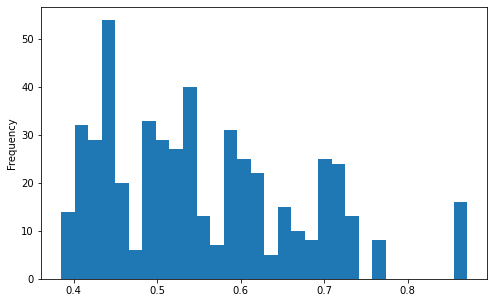

In [16]:
df.NOX.plot.hist(bins=30)

In [18]:
bins = [0, 0.48, 0.58, 0.68, 0.78, 1]
labels = ['level1', 'level2', 'level3', 'level4', 'level5']
df['NOX_categories'] = pd.cut(df['NOX'], labels=labels, bins=bins)
df[['NOX', 'NOX_categories']].head(10)

,NOX,NOX_categories
0,0.54,level2
1,0.47,level1
2,0.47,level1
3,0.46,level1
4,0.46,level1
5,0.46,level1
6,0.52,level2
7,0.52,level2
8,0.52,level2
9,0.52,level2


Overview of the new variable `NOX_categories`

In [19]:
df.NOX_categories.describe(include=np.object)
df.NOX_categories.value_counts()

count        506
unique         5
top       level1
freq         155
Name: NOX_categories, dtype: object

level1    155
level2    153
level3    112
level4     70
level5     16
Name: NOX_categories, dtype: int64

---

# Working with probability distributions

### Examples using the `stats` module of `scipy`:  

**For the Normal distribution:**  
mean, var, skew, kurt = `norm.stats(loc, scale, moments='mvsk')` (to obtain the mean, variance, skewness and kurtosis)  
Probability function: `stats.norm.pmf(loc, scale)`  
Cumulative function: `stats.norm.cdf(loc, scale, x)`  
Generate samples: `stats.norm.rvs(loc, scale, size=5000)`  

**NOTE:** `loc` is the mean and `scale` specifies the standard deviation 


**For the Poisson distribution:**  
mean, var, skew, kurt = `stats.norm.stats(moments='mvsk')`  
Probability function: `stats.poisson.pmf(k, mu)`  
Cumulative function: `stats.poisson.cdf(k, mu)`  
Generate samples: `stats.poisson.rvs(mu, size=5000)`  


*Problem:*
In a book publisher company, the average number of typos per book page follows a poisson distribution with lambda = 0.2.  
What is the probability of finding a page with 2 typos?

In [27]:
# stats.norm.stats(moments='mvsk')

In [23]:
stats.poisson.pmf(2, 0.2)

0.0164

What is the probability of finding a page with up to 2 typos?

In [29]:
stats.poisson.cdf(2, 0.2)

0.9989

In a certain marketing campaign, the number of clicks per add follows a poisson distribution with lambda = 8.  
What is the probability of having 8 clicks in one add?

In [30]:
stats.poisson.pmf(8, 8)

0.1396

What is the probability of having 11 clicks?

In [31]:
stats.poisson.pmf(11, 8)

0.0722

What is the probability that an add gets no clicks?

In [32]:
stats.poisson.pmf(0, 8)

0.0003

### Understanding kurtosis and skewness

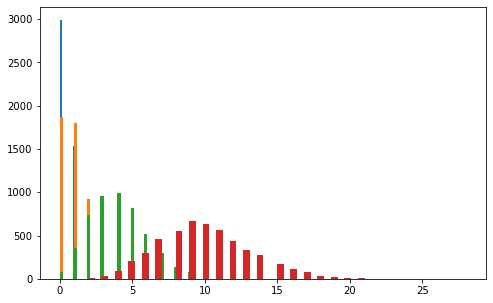

In [37]:
# generate samples from Poisson distribution and different lambdas and plot histograms
lambdas = [0.5, 1, 4, 10]
for l in lambdas:
    p = plt.hist(stats.poisson.rvs(l, size=5000), bins='auto');

Use the function `stats.poisson.stats()` to see how the skewness and kurtosis change depending on lambda

In [39]:
stats.poisson.stats(30, moments='mvsk')

(array(30.), array(30.), array(0.1826), array(0.0333))

---

# Three ways to check the distribution of your data

## 1. Use histograms

you can show the frequency as absolute values:

<AxesSubplot:ylabel='Frequency'>

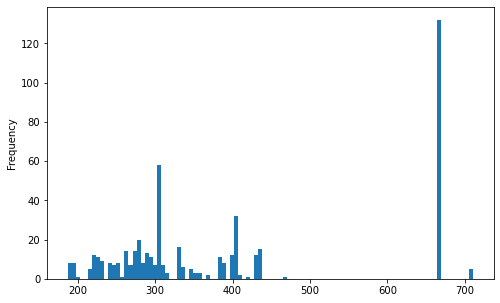

In [35]:
df.TAX.plot.hist(bins=100)

...of you can show as percentages:

<AxesSubplot:ylabel='Frequency'>

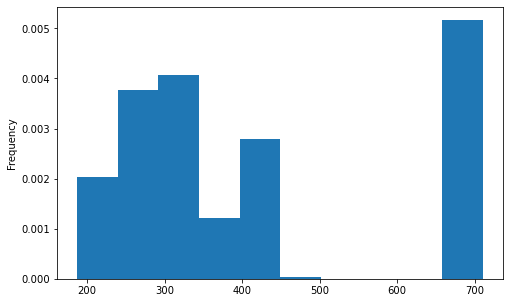

In [36]:
df.TAX.plot.hist(bins=10, density=True)

## 2. Use hypothesis tests

A common way of testing if a variable has a normal distribution is to use the **Shapiro-Wilk Test**.        
In this test, the null hypothesis is that the data comes from a normal distribution.  
When **p < 0.05** we can reject this hypothesis.  

In [40]:
# import the test from scipy
from scipy.stats import shapiro

# create a variable by drawing from a normal distribution
normal_data = np.random.normal(8, 3.3, 100)
# apply the test, which returns the statistic and the p-value
shapiro(normal_data)

ShapiroResult(statistic=0.9856477379798889, pvalue=0.3532653748989105)

The p-value is > 0.05 (by far), so what do we do? 

**Now repeat the test using one of the dataset's variables:**

Is this variable normally distributed?  
Try it yourself using the other variables in the dataset

## 3. Use QQ-plots

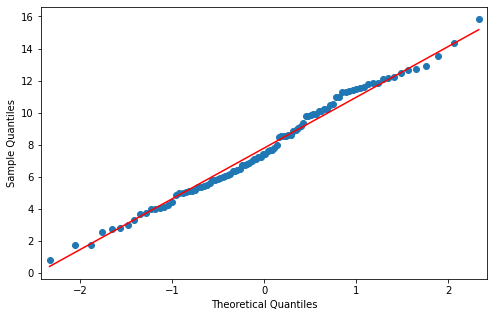

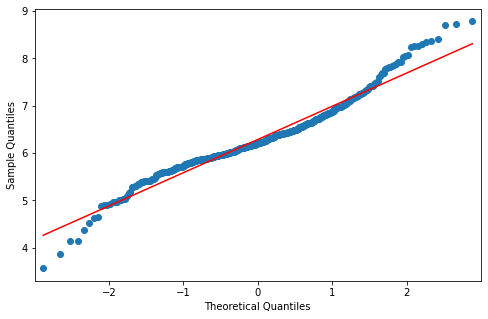

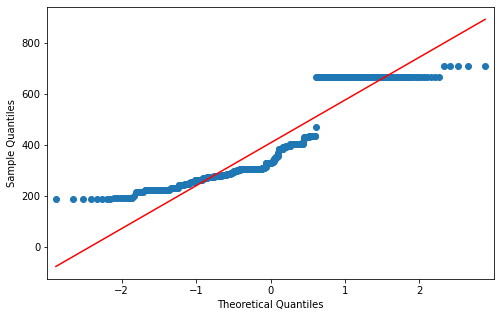

In [41]:
from statsmodels.graphics.gofplots import qqplot

# example of a normally distributed variable
p = qqplot(normal_data, line='s')


# example of a variable approaches normality but has outliers
q = qqplot(df.RM, line='s')

# example of a very not-normally distributed variable
r = qqplot(df.TAX, line='s')

---

# Data transformations

## The most common procedures are *feature scaling* and *linearization*:

1. `Feature scaling` means you transform the data so all quantitative features are, let's say, *speaking the same language*.   
Common scaling techniques are:
* Min-max (a.k.a. **normalization**)
* z-score (a.k.a. **standardization**)  

Particularly, I always use z-score, and this transformation is also the most common method employed in *unsupervised learning* such as PCA, clustering, etc.

2. `Linearization` will be usually needed to transform the `target`, or `dependent` variable, i. e., what you are trying to model

# Feature scaling (a.k.a. standardization, normalization)

## Z-score transformation 

![Image](../images/zscore.gif)   



You can use `scipy.stats.zscore()` or write your own function, which is way more fun:

In [42]:
def my_z_score(data):
    """ Applies z-score transformation to a vector"""
    return data

In [43]:
# generate some data and check the mean and sd before transformation
data = randn(5)
np.mean(data), np.std(data)

(-1.1269, 1.4625)

Now check what happens to the mean and standard deviation after the z-score transformation:

In [44]:
data_std = my_z_score(data)
np.mean(data_std), np.std(data_std)

(-1.1269, 1.4625)

# Linearization
## *Dealing with non-gaussian data* 

There's usually four ways of carrying on the analysis if you are working with regression problems and quantitative **target** variables that are not normally-distributed.
1. Look for models that don't need linear relationships in the data (E. g. random forests, boosted trees)
2. Look for models that can handle different distributions, like Poisson or Binomial (a.k.a. Generalized Linear Models)
3. If you are using a hypothesis test, use bootstrapping to generate to generate the null model 
4. Apply transformations (log, sqrt, box-cox)

**Warning!**  

Log-transformation is a common tool in statistics. However, there is a pitfall in using log transformation of your data.  
Especially if you have a wide numerical range in a feature, keep in mind that log will "compress" the data significantly more, and this can prevent the identification of interesting patterns.

In [45]:
# difference betwee the log and sqrt transformation of a "big" value
np.sqrt(34565)
np.log(34565)

# difference between the log and sqrt transformation of a "small" value
np.sqrt(107)
np.log(107)

185.9166

10.4506

10.3441

4.6728

The function below plots the diagnostic plots **QQ Plots** for two sets of variables, like raw (unstransformed) and transformed data, for comparison. 

In [46]:
def plot_compare_transformations(raw_data, transformed_data, transformation_used):
    fig = plt.figure(figsize = (14, 7))
    ax1 = fig.add_subplot(211)
    prob = stats.probplot(raw_data, dist=stats.norm, plot=ax1)
    ax1.set_xlabel('')
    ax1.set_title('Probplot against the normal distribution (line) ')
    ax2 = fig.add_subplot(212)
    prob = stats.probplot(transformed_data, dist=stats.norm, plot=ax2)
    ax2.set_title('Probplot after ' + transformation_used + ' transformation')
    plt.show()

### Example: 
Try **box-cox** (available in **scipy**)

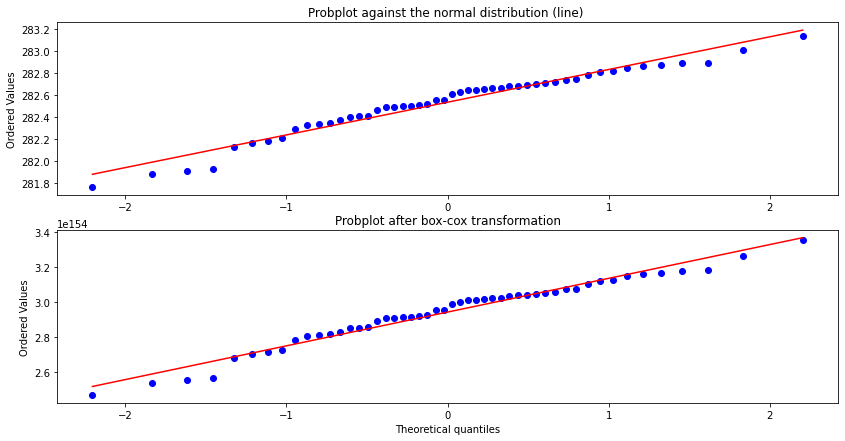

In [47]:
# generate some data with noise
raw_data = stats.loggamma.rvs(14, size=50) + 280

# apply box-cox
transformed_data, _ = stats.boxcox(raw_data)

# plot and compare 
plot_compare_transformations(raw_data, transformed_data, 'box-cox')

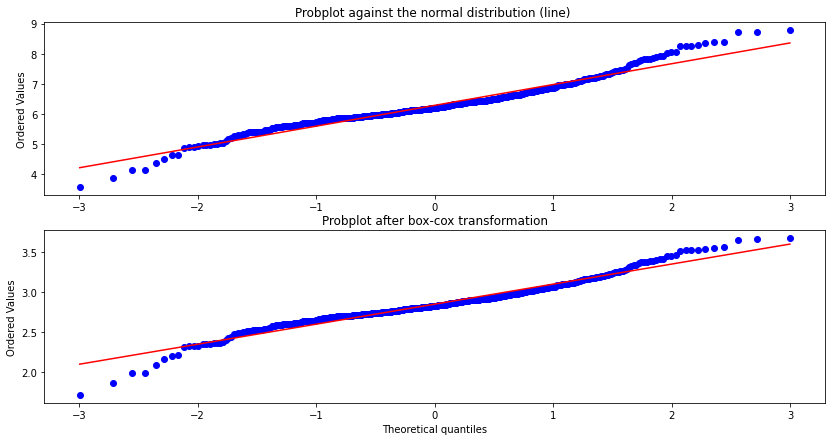

In [48]:
# apply sqrt
transformed_data, _ = stats.boxcox(df.RM)

# plot and compare 
plot_compare_transformations(df.RM, transformed_data, 'box-cox')

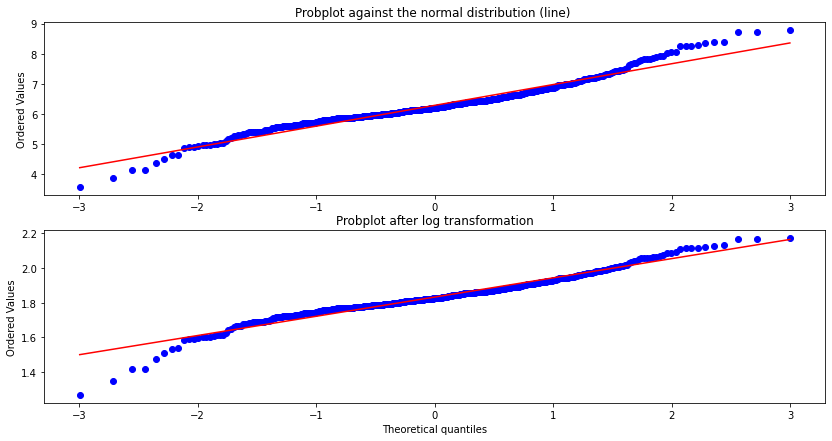

In [49]:
# apply sqrt
transformed_data = np.log(df.RM)

# plot and compare 
plot_compare_transformations(df.RM, transformed_data, 'log')

Now let's see the same effect in numbers:

Example with **Shapiro-Wilks's** test:

In [50]:
print('Test of normal distribution with Shapiros Test')
print('stat:', stats.shapiro(raw_data)[0],'p-value:', stats.shapiro(raw_data)[1])

Test of normal distribution with Shapiros Test
stat: 0.9600358009338379 p-value: 0.0892006978392601


In [51]:
print('Test of normal distribution with Shapiros Test')
print('stat:', stats.shapiro(transformed_data)[0],'p-value:', stats.shapiro(transformed_data)[1])

Test of normal distribution with Shapiros Test
stat: 0.9593969583511353 p-value: 1.3618253746905395e-10


----

<a href='https://www.freepik.com/vectors/data'>Data vector created by stories - www.freepik.com</a>